<img src='https://github.com/CLAIR-LAB-TECHNION/CLAI/blob/main/tutorials/assets/tut_01_goal.png?raw=true'>

## What is PyTorch?

[PyTorch](https://pytorch.org/) is an open source machine learning and deep learning framework.

<img src='https://github.com/CLAIR-LAB-TECHNION/CLAI/blob/main/tutorials/assets/tut_01_why_pytorch.png?raw=true'>

## What can PyTorch be used for?

PyTorch allows you to manipulate and process data and write machine learning algorithms using Python code.

## Who uses PyTorch?

Many of the worlds largest technology companies such as [Meta (Facebook)](https://ai.facebook.com/blog/pytorch-builds-the-future-of-ai-and-machine-learning-at-facebook/), Tesla and Microsoft as well as artificial intelligence research companies such as [OpenAI use PyTorch](https://openai.com/blog/openai-pytorch/) to power research and bring machine learning to their products.

![pytorch being used across industry and research](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-pytorch-being-used-across-research-and-industry.png)

For example, Andrej Karpathy (head of AI at Tesla) has given several talks ([PyTorch DevCon 2019](https://youtu.be/oBklltKXtDE), [Tesla AI Day 2021](https://youtu.be/j0z4FweCy4M?t=2904)) about how Tesla use PyTorch to power their self-driving computer vision models.

## Why use PyTorch?

Machine learning researchers love using PyTorch. And as of February 2022, PyTorch is the [most used deep learning framework on Papers With Code](https://paperswithcode.com/trends), a website for tracking machine learning research papers and the code repositories attached with them.



![Paper Implementations grouped by framework](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*JhId218tCWv77VPFb0M5dg.png)

## Importing PyTorch

> **Note:** Before running any of the code in this notebook, you should have gone through the [PyTorch setup steps](https://pytorch.org/get-started/locally/).
>
> However, **if you're running on Google Colab**, everything should work (Google Colab comes with PyTorch and other libraries installed).



In [1]:
import torch
torch.__version__

'2.2.1+cu121'

## Introduction to tensors

Tensors are the fundamental building block of machine learning.

Their job is to represent data in a numerical way.

For example, you could represent an image as a tensor with shape `[3, 224, 224]` which would mean `[colour_channels, height, width]`, as in the image has `3` colour channels (red, green, blue), a height of `224` pixels and a width of `224` pixels.

![example of going from an input image to a tensor representation of the image, image gets broken down into 3 colour channels as well as numbers to represent the height and width](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-tensor-shape-example-of-image.png)

The tensor would have three dimensions, one for `colour_channels`, `height` and `width`.


### Creating tensors

There's a whole documentation page dedicated to the [`torch.Tensor`](https://pytorch.org/docs/stable/tensors.html) class.

The first thing we're going to create is a **scalar**.

In [2]:
# Scalar
scalar = torch.tensor(7)
scalar

tensor(7)

We can check the dimensions of a tensor using the `ndim` attribute.

In [3]:
scalar.ndim

0

What if we wanted to retrieve the number from the tensor?
To do we can use the `item()` method.

In [4]:
# Get the Python number within a tensor (only works with one-element tensors)
scalar.item()

7

A vector is a single dimension tensor but can contain many numbers.

The important trend here is that a vector is flexible in what it can represent (the same with tensors).

In [5]:
# Vector
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [6]:
# Check the number of dimensions of vector
vector.ndim

1

Another important concept for tensors is their `shape` attribute. The shape tells you how the elements inside them are arranged.

Let's check out the shape of `vector`.

In [7]:
# Check shape of vector
vector.shape

torch.Size([2])

The above returns `torch.Size([2])` which means our vector has a shape of `[2]`. This is because of the two elements we placed inside the square brackets (`[7, 7]`).

Let's now see a **matrix**.

In [8]:
# Matrix
MATRIX = torch.tensor([[7, 8],
                       [9, 10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [9]:
# Check number of dimensions
MATRIX.ndim

2

In [10]:
MATRIX.shape

torch.Size([2, 2])

In [11]:
# Tensor
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [12]:
# Check number of dimensions for TENSOR
TENSOR.ndim

3

In [13]:
# Check shape of TENSOR
TENSOR.shape

torch.Size([1, 3, 3])

Alright, it outputs `torch.Size([1, 3, 3])`.

The dimensions go outer to inner.

That means there's 1 dimension of 3 by 3.

![example of different tensor dimensions](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-pytorch-different-tensor-dimensions.png)

> **Note:** You might've noticed me using lowercase letters for `scalar` and `vector` and uppercase letters for `MATRIX` and `TENSOR`. This was on purpose. In practice, you'll often see scalars and vectors denoted as lowercase letters such as `y` or `a`. And matrices and tensors denoted as uppercase letters such as `X` or `W`.
>
> You also might notice the names martrix and tensor used interchangably. This is common. Since in PyTorch you're often dealing with `torch.Tensor`s (hence the tensor name), however, the shape and dimensions of what's inside will dictate what it actually is.

Let's summarise.

| Name | What is it? | Number of dimensions | Lower or upper (usually/example) |
| ----- | ----- | ----- | ----- |
| **scalar** | a single number | 0 | Lower (`a`) |
| **vector** | a number with direction (e.g. wind speed with direction) but can also have many other numbers | 1 | Lower (`y`) |
| **matrix** | a 2-dimensional array of numbers | 2 | Upper (`Q`) |
| **tensor** | an n-dimensional array of numbers | can be any number, a 0-dimension tensor is a scalar, a 1-dimension tensor is a vector | Upper (`X`) |

![scalar vector matrix tensor and what they look like](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-scalar-vector-matrix-tensor.png)

### Random tensors

We've established tensors represent some form of data.

And machine learning models such as neural networks manipulate and seek patterns within tensors.

But when building machine learning models with PyTorch, it's rare you'll create tensors by hand (like what we've being doing).

Instead, a machine learning model often starts out with large random tensors of numbers and adjusts these random numbers as it works through data to better represent it.

In essence:

`Start with random numbers -> look at data -> update random numbers -> look at data -> update random numbers...`

We can create a tensor of random numbers using [`torch.rand()`](https://pytorch.org/docs/stable/generated/torch.rand.html) and passing in the `size` parameter.

In [14]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(size=(3, 4))
random_tensor, random_tensor.dtype

(tensor([[0.3944, 0.5915, 0.5225, 0.0955],
         [0.0522, 0.0203, 0.4908, 0.7068],
         [0.1859, 0.3072, 0.6415, 0.3684]]),
 torch.float32)

The flexibility of `torch.rand()` is that we can adjust the `size` to be whatever we want.

For example, say you wanted a random tensor in the common image shape of `[224, 224, 3]` (`[height, width, color_channels`]).

In [15]:
# Create a random tensor of size (224, 224, 3)
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

### Zeros and ones

Sometimes you'll just want to fill tensors with zeros or ones.

Let's create a tensor full of zeros with [`torch.zeros()`](https://pytorch.org/docs/stable/generated/torch.zeros.html)


In [16]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3, 4))
zeros, zeros.dtype

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 torch.float32)

We can do the same to create a tensor of all ones except using [`torch.ones()` ](https://pytorch.org/docs/stable/generated/torch.ones.html) instead.

In [17]:
# Create a tensor of all ones
ones = torch.ones(size=(3, 4))
ones, ones.dtype

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 torch.float32)

### Creating a range and tensors like

Sometimes you might want a range of numbers, such as 1 to 10 or 0 to 100.

You can use `torch.arange(start, end, step)` to do so.

Where:
* `start` = start of range (e.g. 0)
* `end` = end of range (e.g. 10)
* `step` = how many steps in between each value (e.g. 1)

> **Note:** In Python, you can use `range()` to create a range. However in PyTorch, `torch.range()` is deprecated and may show an error in the future.

In [18]:
# Use torch.arange(), torch.range() is deprecated
zero_to_ten_deprecated = torch.range(0, 10) # Note: this may return an error in the future

# Create a range of values 0 to 10
zero_to_ten = torch.arange(start=0, end=10, step=1)
zero_to_ten

<ipython-input-18-a404776195c1>:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  zero_to_ten_deprecated = torch.range(0, 10) # Note: this may return an error in the future


tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Sometimes you might want one tensor of a certain type with the same shape as another tensor.

For example, a tensor of all zeros with the same shape as a previous tensor.

To do so you can use [`torch.zeros_like(input)`](https://pytorch.org/docs/stable/generated/torch.zeros_like.html) or [`torch.ones_like(input)`](https://pytorch.org/docs/1.9.1/generated/torch.ones_like.html) which return a tensor filled with zeros or ones in the same shape as the `input` respectively.

In [19]:
# Can also create a tensor of zeros similar to another tensor
ten_zeros = torch.zeros_like(input=zero_to_ten) # will have same shape
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor datatypes

There are many different [tensor datatypes available in PyTorch](https://pytorch.org/docs/stable/tensors.html#data-types).

Some are specific for CPU and some are better for GPU.

Getting to know which is which can take some time.

Generally if you see `torch.cuda` anywhere, the tensor is being used for GPU (since Nvidia GPUs use a computing toolkit called CUDA).

The most common type (and generally the default) is `torch.float32` or `torch.float`.

This is referred to as "32-bit floating point".

But there's also 16-bit floating point (`torch.float16` or `torch.half`) and 64-bit floating point (`torch.float64` or `torch.double`).

The reason for all of these is to do with **precision in computing**.

Precision is the amount of detail used to describe a number.

The higher the precision value (8, 16, 32), the more detail and hence data used to express a number.

This matters in deep learning and numerical computing because you're making so many operations, the more detail you have to calculate on, the more compute you have to use.

So lower precision datatypes are generally faster to compute on but sacrifice some performance on evaluation metrics like accuracy (faster to compute but less accurate).

Let's see how to create some tensors with specific datatypes. We can do so using the `dtype` parameter.

In [20]:
# Default datatype for tensors is float32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # defaults to None, which is torch.float32 or whatever datatype is passed
                               device=None, # defaults to None, which uses the default tensor type
                               requires_grad=False) # if True, operations performed on the tensor are recorded

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

(torch.Size([3]), torch.float32, device(type='cpu'))

Aside from shape issues (tensor shapes don't match up), two of the other most common issues you'll come across in PyTorch are datatype and device issues.

For example, one of tensors is `torch.float32` and the other is `torch.float16` (PyTorch often likes tensors to be the same format).

Or one of your tensors is on the CPU and the other is on the GPU (PyTorch likes calculations between tensors to be on the same device).


For now let's create a tensor with `dtype=torch.float16`.

In [21]:
float_16_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=torch.float16) # torch.half would also work

float_16_tensor.dtype

torch.float16

## Getting information from tensors

Once you've created tensors (or someone else or a PyTorch module has created them for you), you might want to get some information from them.

We've seen these before but three of the most common attributes you'll want to find out about tensors are:
* `shape` - what shape is the tensor? (some operations require specific shape rules)
* `dtype` - what datatype are the elements within the tensor stored in?
* `device` - what device is the tensor stored on? (usually GPU or CPU)

Let's create a random tensor and find out details about it.

In [22]:
# Create a tensor
some_tensor = torch.rand(3, 4)

# Find out details about it
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}") # will default to CPU

tensor([[0.2116, 0.5657, 0.6162, 0.6758],
        [0.4150, 0.2699, 0.7317, 0.7022],
        [0.9420, 0.2833, 0.0347, 0.7372]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## Manipulating tensors (tensor operations)

### Basic operations

Let's start with a few of the fundamental operations, addition (`+`), subtraction (`-`), mutliplication (`*`).

They work just as you think they would.

In [23]:
# Create a tensor of values and add a number to it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [24]:
# Multiply it by 10
tensor * 10

tensor([10, 20, 30])

PyTorch also has a bunch of built-in functions like [`torch.mul()`](https://pytorch.org/docs/stable/generated/torch.mul.html#torch.mul) (short for multiplication) and [`torch.add()`](https://pytorch.org/docs/stable/generated/torch.add.html) to perform basic operations.

In [25]:
# Can also use torch functions
torch.multiply(tensor, 10)

tensor([10, 20, 30])

In [26]:
# Original tensor is still unchanged
tensor

tensor([1, 2, 3])

However, it's more common to use the operator symbols like `*` instead of `torch.mul()`

In [27]:
# Element-wise multiplication (each element multiplies its equivalent, index 0->0, 1->1, 2->2)
print(tensor, "*", tensor)
print("Equals:", tensor * tensor)

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


### Matrix multiplication

PyTorch implements matrix multiplication functionality in the [`torch.matmul()`](https://pytorch.org/docs/stable/generated/torch.matmul.html) method.

The main two rules for matrix multiplication to remember are:

1. The **inner dimensions** must match:
  * `(3, 2) @ (3, 2)` won't work
  * `(2, 3) @ (3, 2)` will work
  * `(3, 2) @ (2, 3)` will work
2. The resulting matrix has the shape of the **outer dimensions**:
 * `(2, 3) @ (3, 2)` -> `(2, 2)`
 * `(3, 2) @ (2, 3)` -> `(3, 3)`

> **Note:** "`@`" in Python is the symbol for matrix multiplication.

> **Resource:** You can see all of the rules for matrix multiplication using `torch.matmul()` [in the PyTorch documentation](https://pytorch.org/docs/stable/generated/torch.matmul.html).

Let's create a tensor and perform element-wise multiplication and matrix multiplication on it.



In [28]:
import torch
tensor = torch.tensor([1, 2, 3])
tensor.shape

torch.Size([3])

The difference between element-wise multiplication and matrix multiplication is the addition of values.

For our `tensor` variable with values `[1, 2, 3]`:

| Operation | Calculation | Code |
| ----- | ----- | ----- |
| **Element-wise multiplication** | `[1*1, 2*2, 3*3]` = `[1, 4, 9]` | `tensor * tensor` |
| **Matrix multiplication** | `[1*1 + 2*2 + 3*3]` = `[14]` | `tensor.matmul(tensor)` |


In [29]:
# Element-wise matrix multiplication
tensor * tensor

tensor([1, 4, 9])

In [30]:
# Matrix multiplication
torch.matmul(tensor, tensor)

tensor(14)

You can do matrix multiplication by hand but it's not recommended.

The in-built `torch.matmul()` method is faster.

In [31]:
%%time
# Matrix multiplication by hand
# (avoid doing operations with for loops at all cost, they are computationally expensive)
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
value

CPU times: user 1.47 ms, sys: 86 µs, total: 1.55 ms
Wall time: 3.23 ms


tensor(14)

In [32]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 1.03 ms, sys: 28 µs, total: 1.06 ms
Wall time: 875 µs


tensor(14)

## One of the most common errors in deep learning (shape errors)

Because much of deep learning is multiplying and performing operations on matrices and matrices have a strict rule about what shapes and sizes can be combined, one of the most common errors you'll run into in deep learning is shape mismatches.

In [35]:
%%script false --no-raise-error


# Shapes need to be in the right way
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]], dtype=torch.float32)

torch.matmul(tensor_A, tensor_B) # (this will error) - delete the first line in the block to see the error

We can make matrix multiplication work between `tensor_A` and `tensor_B` by making their inner dimensions match.

One of the ways to do this is with a **transpose** (switch the dimensions of a given tensor).

You can perform transposes in PyTorch using either:
* `torch.transpose(input, dim0, dim1)` - where `input` is the desired tensor to transpose and `dim0` and `dim1` are the dimensions to be swapped.
* `tensor.T` - where `tensor` is the desired tensor to transpose.

Let's try the latter.

In [36]:
# View tensor_A and tensor_B
print(tensor_A)
print(tensor_B)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7., 10.],
        [ 8., 11.],
        [ 9., 12.]])


In [37]:
# View tensor_A and tensor_B.T
print(tensor_A)
print(tensor_B.T)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])


In [38]:
# The operation works when tensor_B is transposed
print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}\n")
print(f"New shapes: tensor_A = {tensor_A.shape} (same as above), tensor_B.T = {tensor_B.T.shape}\n")
print(f"Multiplying: {tensor_A.shape} * {tensor_B.T.shape} <- inner dimensions match\n")
print("Output:\n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output)
print(f"\nOutput shape: {output.shape}")

Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])

New shapes: tensor_A = torch.Size([3, 2]) (same as above), tensor_B.T = torch.Size([2, 3])

Multiplying: torch.Size([3, 2]) * torch.Size([2, 3]) <- inner dimensions match

Output:

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

Output shape: torch.Size([3, 3])


You can also use [`torch.mm()`](https://pytorch.org/docs/stable/generated/torch.mm.html) which is a short for `torch.matmul()`.

In [39]:
# torch.mm is a shortcut for matmul
torch.mm(tensor_A, tensor_B.T)

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

Without the transpose, the rules of matrix mulitplication aren't fulfilled and we get an error like above.

How about a visual?

![visual demo of matrix multiplication](https://github.com/mrdbourke/pytorch-deep-learning/raw/main/images/00-matrix-multiply-crop.gif)

You can create your own matrix multiplication visuals like this at http://matrixmultiplication.xyz/.

> **Note:** A matrix multiplication like this is also referred to as the [**dot product**](https://www.mathsisfun.com/algebra/vectors-dot-product.html) of two matrices.



Neural networks are full of matrix multiplications and dot products.

The [`torch.nn.Linear()`](https://pytorch.org/docs/1.9.1/generated/torch.nn.Linear.html) module, also known as a feed-forward layer or fully connected layer, implements a matrix multiplication between an input `x` and a weights matrix `A`.

$$
y = x\cdot{A^T} + b
$$





In [40]:
# Since the linear layer starts with a random weights matrix, let's make it reproducible (more on this later)
torch.manual_seed(42)
# This uses matrix multiplication
linear = torch.nn.Linear(in_features=2, # in_features = matches inner dimension of input
                         out_features=6) # out_features = describes outer value
x = tensor_A
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([3, 2])

Output:
tensor([[2.2368, 1.2292, 0.4714, 0.3864, 0.1309, 0.9838],
        [4.4919, 2.1970, 0.4469, 0.5285, 0.3401, 2.4777],
        [6.7469, 3.1648, 0.4224, 0.6705, 0.5493, 3.9716]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([3, 6])


Remember, matrix multiplication is all you need.

![matrix multiplication is all you need](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00_matrix_multiplication_is_all_you_need.jpeg)

*When you start digging into neural network layers and building your own, you'll find matrix multiplications everywhere. **Source:** https://marksaroufim.substack.com/p/working-class-deep-learner*

### Finding the min, max, mean, sum, etc (aggregation)

Now we've seen a few ways to manipulate tensors, let's run through a few ways to aggregate them (go from more values to less values).

First we'll create a tensor and then find the max, min, mean and sum of it.





In [41]:
# Create a tensor
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

Now let's perform some aggregation.

In [42]:
print(f"Minimum: {x.min()}")
print(f"Maximum: {x.max()}")
# print(f"Mean: {x.mean()}") # this will error
print(f"Mean: {x.type(torch.float32).mean()}") # won't work without float datatype
print(f"Sum: {x.sum()}")

Minimum: 0
Maximum: 90
Mean: 45.0
Sum: 450


> **Note:** You may find some methods such as `torch.mean()` require tensors to be in `torch.float32` (the most common) or another specific datatype, otherwise the operation will fail.

You can also do the same as above with `torch` methods.

In [43]:
torch.max(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x)

(tensor(90), tensor(0), tensor(45.), tensor(450))

### Positional min/max

You can also find the index of a tensor where the max or minimum occurs with [`torch.argmax()`](https://pytorch.org/docs/stable/generated/torch.argmax.html) and [`torch.argmin()`](https://pytorch.org/docs/stable/generated/torch.argmin.html) respectively.

This is helpful incase you just want the position where the highest (or lowest) value is and not the actual value itself (we'll see this in a later section when using the [softmax activation function](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html)).

In [44]:
# Create a tensor
tensor = torch.arange(10, 100, 10)
print(f"Tensor: {tensor}")

# Returns index of max and min values
print(f"Index where max value occurs: {tensor.argmax()}")
print(f"Index where min value occurs: {tensor.argmin()}")

Tensor: tensor([10, 20, 30, 40, 50, 60, 70, 80, 90])
Index where max value occurs: 8
Index where min value occurs: 0


### Reshaping, stacking, squeezing and unsqueezing

Often times you'll want to reshape or change the dimensions of your tensors without actually changing the values inside them.

To do so, some popular methods are:

| Method | One-line description |
| ----- | ----- |
| [`torch.reshape(input, shape)`](https://pytorch.org/docs/stable/generated/torch.reshape.html#torch.reshape) | Reshapes `input` to `shape` (if compatible), can also use `torch.Tensor.reshape()`. |
| [`Tensor.view(shape)`](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html) | Returns a view of the original tensor in a different `shape` but shares the same data as the original tensor. |
| [`torch.stack(tensors, dim=0)`](https://pytorch.org/docs/1.9.1/generated/torch.stack.html) | Concatenates a sequence of `tensors` along a new dimension (`dim`), all `tensors` must be same size. |
| [`torch.squeeze(input)`](https://pytorch.org/docs/stable/generated/torch.squeeze.html) | Squeezes `input` to remove all the dimenions with value `1`. |
| [`torch.unsqueeze(input, dim)`](https://pytorch.org/docs/1.9.1/generated/torch.unsqueeze.html) | Returns `input` with a dimension value of `1` added at `dim`. |
| [`torch.permute(input, dims)`](https://pytorch.org/docs/stable/generated/torch.permute.html) | Returns a *view* of the original `input` with its dimensions permuted (rearranged) to `dims`. |

Why do any of these?

Because deep learning models (neural networks) are all about manipulating tensors in some way. And because of the rules of matrix multiplication, if you've got shape mismatches, you'll run into errors. These methods help you make sure the right elements of your tensors are mixing with the right elements of other tensors.


First, we'll create a tensor.

In [45]:
# Create a tensor
import torch
x = torch.arange(1., 8.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7.]), torch.Size([7]))

Now let's add an extra dimension with `torch.reshape()`.

In [46]:
# Add an extra dimension
x_reshaped = x.reshape(1, 7)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

We can also change the view with `torch.view()`.

In [47]:
# Change view (keeps same data as original but changes view)
# See more: https://stackoverflow.com/a/54507446/7900723
z = x.view(1, 7)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

Remember though, changing the view of a tensor with `torch.view()` really only creates a new view of the *same* tensor.

So changing the view changes the original tensor too.

In [48]:
# Changing z changes x
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7.]]), tensor([5., 2., 3., 4., 5., 6., 7.]))

If we wanted to stack our new tensor on top of itself five times, we could do so with `torch.stack()`.

In [49]:
# Stack tensors on top of each other
x_stacked = torch.stack([x, x, x, x], dim=0) # try changing dim to dim=1 and see what happens
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.]])

How about removing all single dimensions from a tensor?

To do so you can use `torch.squeeze()` (I remember this as *squeezing* the tensor to only have dimensions over 1).

In [50]:
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
Previous shape: torch.Size([1, 7])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
New shape: torch.Size([7])


And to do the reverse of `torch.squeeze()` you can use `torch.unsqueeze()` to add a dimension value of 1 at a specific index.

In [51]:
print(f"Previous tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

## Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

Previous tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
Previous shape: torch.Size([7])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
New shape: torch.Size([1, 7])


You can also rearrange the order of axes values with `torch.permute(input, dims)`, where the `input` gets turned into a *view* with new `dims`.

In [52]:
# Create tensor with specific shape
x_original = torch.rand(size=(224, 224, 3))

# Permute the original tensor to rearrange the axis order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


> **Note**: Because permuting returns a *view* (shares the same data as the original), the values in the permuted tensor will be the same as the original tensor and if you change the values in the view, it will change the values of the original.

## Indexing (selecting data from tensors)

Sometimes you'll want to select specific data from tensors.

To do so, you can use indexing.

If you've ever done indexing on Python lists or NumPy arrays, indexing in PyTorch with tensors is very similar.

In [53]:
# Create a tensor
import torch
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

Indexing values goes outer dimension -> inner dimension (check out the square brackets).

In [54]:
# Let's index bracket by bracket
print(f"First square bracket:\n{x[0]}")
print(f"Second square bracket: {x[0][0]}")
print(f"Third square bracket: {x[0][0][0]}")

First square bracket:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Second square bracket: tensor([1, 2, 3])
Third square bracket: 1


You can also use `:` to specify "all values in this dimension" and then use a comma (`,`) to add another dimension.

In [55]:
# Get all values of 0th dimension and the 0 index of 1st dimension
x[:, 0]

tensor([[1, 2, 3]])

In [56]:
# Get all values of 0th & 1st dimensions but only index 1 of 2nd dimension
x[:, :, 1]

tensor([[2, 5, 8]])

In [57]:
# Get all values of the 0 dimension but only the 1 index value of the 1st and 2nd dimension
x[:, 1, 1]

tensor([5])

In [58]:
# Get index 0 of 0th and 1st dimension and all values of 2nd dimension
x[0, 0, :] # same as x[0][0]

tensor([1, 2, 3])

## PyTorch tensors & NumPy

Since NumPy is a popular Python numerical computing library, PyTorch has functionality to interact with it nicely.  

The two main methods you'll want to use for NumPy to PyTorch (and back again) are:
* [`torch.from_numpy(ndarray)`](https://pytorch.org/docs/stable/generated/torch.from_numpy.html) - NumPy array -> PyTorch tensor.
* [`torch.Tensor.numpy()`](https://pytorch.org/docs/stable/generated/torch.Tensor.numpy.html) - PyTorch tensor -> NumPy array.

Let's try them out.

In [59]:
# NumPy array to tensor
import torch
import numpy as np
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

> **Note:** By default, NumPy arrays are created with the datatype `float64` and if you convert it to a PyTorch tensor, it'll keep the same datatype (as above).
>
> However, many PyTorch calculations default to using `float32`.
>
> So if you want to convert your NumPy array (float64) -> PyTorch tensor (float64) -> PyTorch tensor (float32), you can use `tensor = torch.from_numpy(array).type(torch.float32)`.

Because we reassigned `tensor` above, if you change the tensor, the array stays the same.

In [60]:
# Change the array, keep the tensor
array = array + 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

And if you want to go from PyTorch tensor to NumPy array, you can call `tensor.numpy()`.

In [61]:
# Tensor to NumPy array
tensor = torch.ones(7) # create a tensor of ones with dtype=float32
numpy_tensor = tensor.numpy() # will be dtype=float32 unless changed
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

And the same rule applies as above, if you change the original `tensor`, the new `numpy_tensor` stays the same.

In [62]:
# Change the tensor, keep the array the same
tensor = tensor + 1
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

<img src='https://github.com/CLAIR-LAB-TECHNION/CLAI/blob/main/tutorials/assets/tut_01_pytorch_vs_numpy.png?raw=true'>

## Reproducibility (trying to take the random out of random)

As you learn more about neural networks and machine learning, you'll start to discover how much randomness plays a part.

Although randomness is nice and powerful, sometimes you'd like there to be a little less randomness.

Why?

So you can perform repeatable experiments.

How could they do such a thing?

That's where **reproducibility** comes in.

Let's see a brief example of reproducibility in PyTorch.


In [63]:
import torch

# Create two random tensors
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(f"Tensor A:\n{random_tensor_A}\n")
print(f"Tensor B:\n{random_tensor_B}\n")
print(f"Does Tensor A equal Tensor B? (anywhere)")
random_tensor_A == random_tensor_B

Tensor A:
tensor([[0.8016, 0.3649, 0.6286, 0.9663],
        [0.7687, 0.4566, 0.5745, 0.9200],
        [0.3230, 0.8613, 0.0919, 0.3102]])

Tensor B:
tensor([[0.9536, 0.6002, 0.0351, 0.6826],
        [0.3743, 0.5220, 0.1336, 0.9666],
        [0.9754, 0.8474, 0.8988, 0.1105]])

Does Tensor A equal Tensor B? (anywhere)


tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

Just as you might've expected, the tensors come out with different values.

But what if you wanted to created two random tensors with the *same* values.

As in, the tensors would still contain random values but they would be of the same flavour.

That's where [`torch.manual_seed(seed)`](https://pytorch.org/docs/stable/generated/torch.manual_seed.html) comes in, where `seed` is an integer (like `42` but it could be anything) that flavours the randomness.

Let's try it out by creating some more *flavoured* random tensors.

In [64]:
import torch
import random

# # Set the random seed
RANDOM_SEED=42 # try changing this to different values and see what happens to the numbers below
torch.manual_seed(seed=RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)

# Have to reset the seed every time a new rand() is called
# Without this, tensor_D would be different to tensor_C
torch.random.manual_seed(seed=RANDOM_SEED) # try commenting this line out and seeing what happens
random_tensor_D = torch.rand(3, 4)

print(f"Tensor C:\n{random_tensor_C}\n")
print(f"Tensor D:\n{random_tensor_D}\n")
print(f"Does Tensor C equal Tensor D? (anywhere)")
random_tensor_C == random_tensor_D

Tensor C:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Tensor D:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Does Tensor C equal Tensor D? (anywhere)


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


> **Resource:** What we've just covered only scratches the surface of reproducibility in PyTorch. For more, on reproducbility in general and random seeds, I'd checkout:
> * [The PyTorch reproducibility documentation](https://pytorch.org/docs/stable/notes/randomness.html)
> * [The Wikipedia random seed page](https://en.wikipedia.org/wiki/Random_seed) (this'll give a good overview of random seeds and pseudorandomness in general).

## Running tensors on GPUs (and making faster computations)

Deep learning algorithms require a lot of numerical operations.

And by default these operations are often done on a CPU.

> **Note:** When I reference "GPU" throughout this course, I'm referencing a [Nvidia GPU with CUDA](https://developer.nvidia.com/cuda-gpus) enabled (CUDA is a computing platform and API that helps allow GPUs be used for general purpose computing & not just graphics) unless otherwise specified.




### 1. Getting a GPU

You may already know what's going on when I say GPU. But if not, there are a few ways to get access to one.

| **Method** | **Difficulty to setup** | **Pros** | **Cons** | **How to setup** |
| ----- | ----- | ----- | ----- | ----- |
| Google Colab | Easy | Free to use, almost zero setup required, can share work with others as easy as a link | Doesn't save your data outputs, limited compute, subject to timeouts | [Follow the Google Colab Guide](https://colab.research.google.com/notebooks/gpu.ipynb) |
| Use your own | Medium | Run everything locally on your own machine | GPUs aren't free, require upfront cost | Follow the [PyTorch installation guidelines](https://pytorch.org/get-started/locally/) |
| Cloud computing (AWS, GCP, Azure) | Medium-Hard | Small upfront cost, access to almost infinite compute | Can get expensive if running continually, takes some time to setup right | Follow the [PyTorch installation guidelines](https://pytorch.org/get-started/cloud-partners/) |

There are more options for using GPUs but the above three will suffice for now.

Personally, I use a combination of Google Colab and my own personal computer for small scale experiments (and creating this course) and go to cloud resources when I need more compute power.

> **Resource:** If you're looking to purchase a GPU of your own but not sure what to get, [Tim Dettmers has an excellent guide](https://timdettmers.com/2020/09/07/which-gpu-for-deep-learning/).

To check if you've got access to a Nvidia GPU, you can run `!nvidia-smi`



In [65]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


If you don't have a Nvidia GPU accessible, the above will output something like:

```
NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.
```

In that case, go back up and follow the install steps.

If you do have a GPU, the line above will output something like:

```
Wed Jan 19 22:09:08 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU   GI   CI        PID   Type   Process name                  GPU Memory |
|        ID   ID                                                   Usage      |
|=============================================================================|
|  No running processes found                                                 |
+-----------------------------------------------------------------------------+
```



### 2. Getting PyTorch to run on the GPU

Once you've got a GPU ready to access, the next step is getting PyTorch to use for storing data (tensors) and computing on data (performing operations on tensors).

To do so, you can use the [`torch.cuda`](https://pytorch.org/docs/stable/cuda.html) package.

You can test if PyTorch has access to a GPU using [`torch.cuda.is_available()`](https://pytorch.org/docs/stable/generated/torch.cuda.is_available.html#torch.cuda.is_available).


In [66]:
# Check for GPU
import torch
torch.cuda.is_available()

False

If the above outputs `True`, PyTorch can see and use the GPU, if it outputs `False`, it can't see the GPU and in that case, you'll have to go back through the installation steps.

Now, let's say you wanted to setup your code so it ran on CPU *or* the GPU if it was available.

That way, if you or someone decides to run your code, it'll work regardless of the computing device they're using.

Let's create a `device` variable to store what kind of device is available.

In [67]:
# Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

If the above output `"cuda"` it means we can set all of our PyTorch code to use the available CUDA device (a GPU) and if it output `"cpu"`, our PyTorch code will stick with the CPU.

> **Note:** In PyTorch, it's best practice to write [**device agnostic code**](https://pytorch.org/docs/master/notes/cuda.html#device-agnostic-code). This means code that'll run on CPU (always available) or GPU (if available).

If you want to do faster computing you can use a GPU but if you want to do *much* faster computing, you can use multiple GPUs.

You can count the number of GPUs PyTorch has access to using [`torch.cuda.device_count()`](https://pytorch.org/docs/stable/generated/torch.cuda.device_count.html#torch.cuda.device_count).

In [68]:
# Count number of devices
torch.cuda.device_count()

0

Knowing the number of GPUs PyTorch has access to is helpful incase you wanted to run a specific process on one GPU and another process on another (PyTorch also has features to let you run a process across *all* GPUs).

### 3. Putting tensors (and models) on the GPU

You can put tensors (and models, we'll see this later) on a specific device by calling [`to(device)`](https://pytorch.org/docs/stable/generated/torch.Tensor.to.html) on them. Where `device` is the target device you'd like the tensor (or model) to go to.

Why do this?

GPUs offer far faster numerical computing than CPUs do and if a GPU isn't available, because of our **device agnostic code** (see above), it'll run on the CPU.

> **Note:** Putting a tensor on GPU using `to(device)` (e.g. `some_tensor.to(device)`) returns a copy of that tensor, e.g. the same tensor will be on CPU and GPU. To overwrite tensors, reassign them:
>
> `some_tensor = some_tensor.to(device)`

Let's try creating a tensor and putting it on the GPU (if it's available).

In [69]:
# Create tensor (default on CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)

# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3]) cpu


tensor([1, 2, 3])

If you have a GPU available, the above code will output something like:

```
tensor([1, 2, 3]) cpu
tensor([1, 2, 3], device='cuda:0')
```

Notice the second tensor has `device='cuda:0'`, this means it's stored on the 0th GPU available (GPUs are 0 indexed, if two GPUs were available, they'd be `'cuda:0'` and `'cuda:1'` respectively, up to `'cuda:n'`).



### 4. Moving tensors back to the CPU

What if we wanted to move the tensor back to CPU?

For example, you'll want to do this if you want to interact with your tensors with NumPy (NumPy does not leverage the GPU).

Let's try using the [`torch.Tensor.numpy()`](https://pytorch.org/docs/stable/generated/torch.Tensor.numpy.html) method on our `tensor_on_gpu`.

In [70]:
# If tensor is on GPU, can't transform it to NumPy (this will error)
tensor_on_gpu.numpy()

array([1, 2, 3])

Instead, to get a tensor back to CPU and usable with NumPy we can use [`Tensor.cpu()`](https://pytorch.org/docs/stable/generated/torch.Tensor.cpu.html).

This copies the tensor to CPU memory so it's usable with CPUs.

In [71]:
# Instead, copy the tensor back to cpu
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

The above returns a copy of the GPU tensor in CPU memory so the original tensor is still on GPU.

In [72]:
tensor_on_gpu

tensor([1, 2, 3])

## Neural-Network specific functions
PyTorch has a bunch of built-in funcitons. See the docs for a full list.

In [73]:
import matplotlib.pyplot as plt
def plot(xs, ys, xlim=(-3, 3), ylim=(-3, 3)):
  fig, ax = plt.subplots()
  ax.plot(xs, ys, linewidth=5)
  # ax.set_aspect('equal')
  ax.grid(True, which='both')

  ax.axhline(y=0, color='k')
  ax.axvline(x=0, color='k')
  ax.set_xlim(*xlim)
  ax.set_ylim(*ylim)

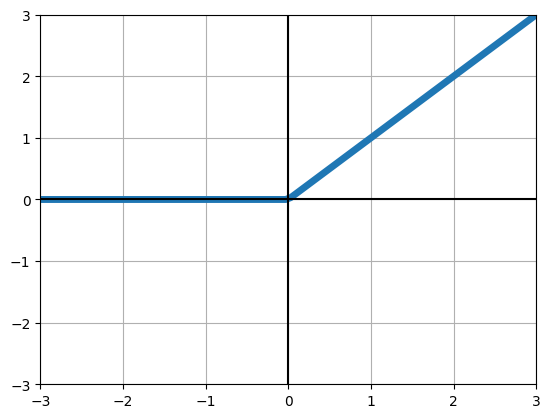

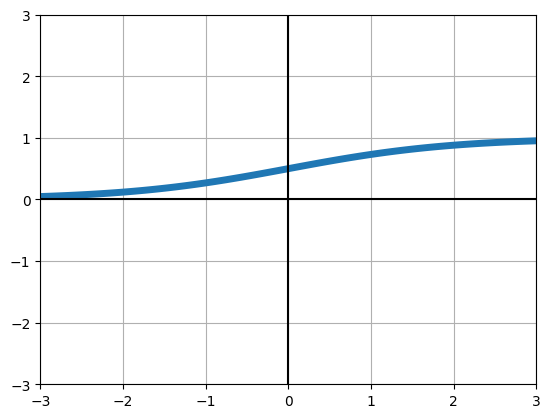

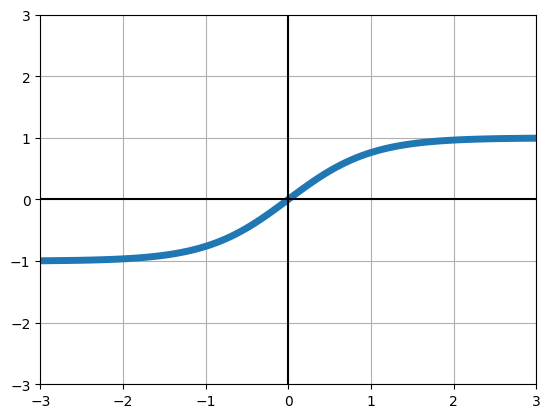

In [74]:
# Activation functions
xs = torch.linspace(-3, 3, 100)
ys = torch.relu(xs)
plot(xs.numpy(), ys.numpy())
ys = torch.sigmoid(xs)
plot(xs.numpy(), ys.numpy())
ys = torch.tanh(xs)
plot(xs.numpy(), ys.numpy())

## Automatic differentiation

Given some loss function
$$L(\vec x, \vec y) = ||2 \vec x + \vec y||_2^2$$
we want to evaluate
$$\frac{\partial L}{\partial \vec x}$$ and $$\frac{\partial L}{\partial \vec y}$$

The most important aspect which sets `pytorch` apart from `numpy` is the **automatic differentiation**.

Pytorch can automatically *track* computations performed on tensors to build a *computation graph* which can be used for applying the chain rule in order to compute arbitrary derivatives.

In the remainder of the course we'll go deeper, and use this ability extensively to train neural networks via the back-propagation algorithm.

For now, we'll only show a short demo of this functionality.



In [75]:
# By default, tensors have requires_grad=False. Need to specify if you want
# the gradients for a tensor!
shape = (3, )
w = torch.tensor([1., 2, 3], requires_grad=True)
x = 2*w
y = torch.exp(-x)
z = y ** 3 - 2
l = torch.sum(z)
l

tensor(-5.9975, grad_fn=<SumBackward0>)

In [76]:
from torch import autograd

# This is where the magic happens
w_grad = autograd.grad(l, w)
w_grad

(tensor([-1.4873e-02, -3.6865e-05, -9.1380e-08]),)

Notice the `grad_fn` property on the tensor. We can trace our way back through these grad functions to see the whole computation graph:

  Preparing metadata (setup.py) ... done


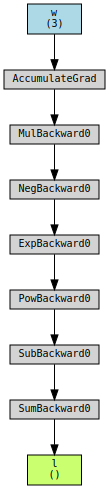

In [77]:
%pip install -Uq git+https://github.com/szagoruyko/pytorchviz.git@master
from torchviz import make_dot

make_dot(l, params=dict(w=w, l=l))

### stopping and starting gradients
If you don't specify `required_grad=True`, the gradient will always be `None`.


In [78]:
shape = (3, )
x = torch.tensor([1., 2, 3], requires_grad=True)
y = torch.ones(shape)
loss = ((2 * x + y)**2).sum()
loss.backward()
print(x.grad)
print(y.grad)

tensor([12., 20., 28.])
None


You can cut a gradient by calling `y.detach()`, which will return a new tensor with `required_grad=False`. Note that `detach` is not an in-place operation! You would want this during evaluation.

In [79]:
shape = (3, )
x = torch.tensor([1., 2, 3], requires_grad=True)
y = torch.ones(shape, requires_grad=True)
y_detached = y.detach()
loss = ((2 * x + y)**2).sum()
loss.backward()
print(x.grad)
print(y.grad)
print(y_detached.grad)
print(y.detach())

tensor([12., 20., 28.])
tensor([ 6., 10., 14.])
None
tensor([1., 1., 1.])


A few things to watch out for:
- You can't do any in-place operations on a tensor that has `requires_grad=True`. (This prevents you from inadvertently mutating it in a way that isn't tracked for backprop purposes.)

- You also can't convert a tensor with `requires_grad=True` to numpy (for the same reason as above). Instead, you need to detach it first, e.g. `y.detach().numpy()`.

- Even though `y.detach()` returns a new tensor, that tensor occupies the same memory as `y`. Unfortunately, PyTorch lets you make changes to `y.detach()` or `y.detach.numpy()` which will affect `y` as well! If you want to safely mutate the detached version, you should use `y.detach().clone()` instead, which will create a tensor in new memory.

RL Connection: You would want to be doing simulator-related tasks with numpy, convert to torch when doing model-related tasks, and convert back to feed output into simulator.

## Example: Regression Task
Let's train a simple neural network to model a sine wave. This is our target:

torch.Size([100, 1])


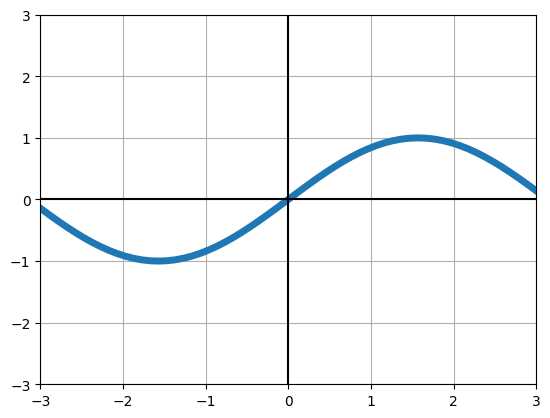

In [80]:
x = torch.linspace(-5, 5, 100).view(100, 1)
print(x.shape)
y_target = torch.sin(x)
plot(x, y_target)

In [81]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

Using device: cpu


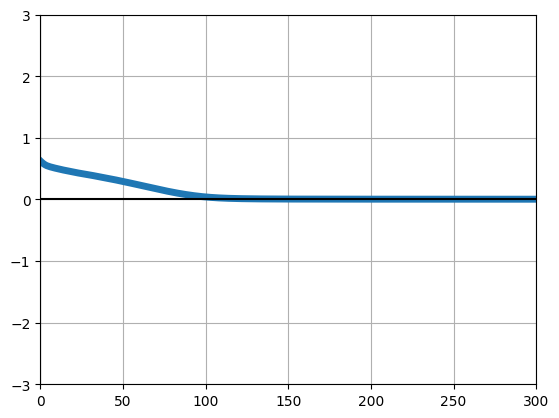

In [82]:
# Define the data
x = torch.linspace(-5, 5, 100).view(-1, 1)
y_target = torch.sin(x)

net = Net(input_size=1, output_size=1)
########## (NEW) ##########
# Set up GPU device (if available) and move model and targets
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
net = net.to(device)
y_target = y_target.to(device)
########## (NEW) ##########

optimizer = optim.Adam(net.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()
losses = []

for _ in range(300):
    ########## (NEW) ##########
    x = x.to(device)
    ########## (NEW) ##########
    y = net(x)
    loss = loss_fn(y, y_target)
    losses.append(loss.detach().cpu().numpy())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

plot(range(300), losses, xlim=(0, 300))

To summarize, here's what we did:

- Defined a class for our neural network (subclass of `nn.Module`)
- Specified a loss function (MSE loss) and optimizer (Adam) --> make sure to pass all model parameters (especially for multimodal)
- Performed training by doing the following in a loop:
    - Make prediction
    - Compute loss
    - Zero the stored gradients
    - Backprop the loss with `.backward()`
    - Update the weights by taking a step of gradient descent

### Evaluating the model

Notice the .eval() and with torch.no_grad() -- make sure to include these whenever making predictions at test time!

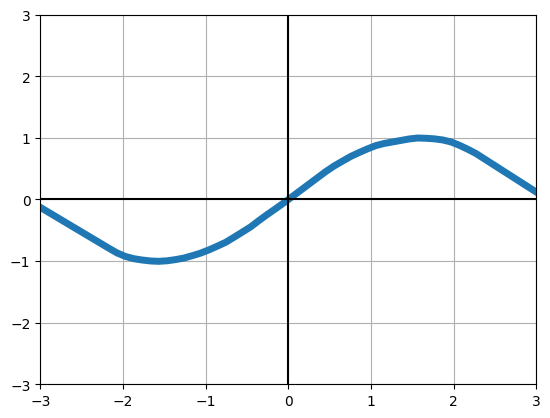

In [83]:
net.eval() # Switches the network to evaluation mode, disabling things like dropout and batch norm
with torch.no_grad(): # Temporarily disables all `requires_grad` within the enclosed block
    y = net(x)
plot(x.cpu().numpy(), y.cpu().numpy())

# PyTorch - Advanced

## Distributions
PyTorch has a very convenient [distributions](https://pytorch.org/docs/stable/distributions.html) package for probability distributions. This is useful since in RL we often work with stochastic policies (e.g. $\pi(a|s_0)= $ some Gaussian distribution).


These distributions are instances of the more general `Distribution` class, which you can read more about [here](https://pytorch.org/docs/stable/distributions.html#distribution).

The two most useful operations you can do with `Distribution` objects are `sample` and `log_prob`:

In [84]:
from torch import distributions

# Univariate Gaussian with mean 0, std 1
mean = torch.zeros(1, requires_grad=True)
std = torch.ones(1, requires_grad=True)
gaussian = distributions.Normal(mean, std)
sample = gaussian.sample((1,))
print(sample)
log_prob = gaussian.log_prob(sample)

tensor([[-0.8443]])


The log probability depends on the the parameters of the distribution. So, calling `backward` on a loss that depends on `log_prob` will back-propagate gradients into the parameters of the distribution.

In [85]:
loss = -log_prob.sum()
loss.backward()
mean.grad

tensor([0.8443])

### Batch-Wise distribution

The distributions also support batch-operations. In this case, all the operations (`sample`, `log_prob`, etc.) are batch-wise.

In [86]:
mean = torch.zeros(10)
std = torch.ones(10)
gaussian = distributions.Normal(mean, std)
print(gaussian)
print(gaussian.batch_shape)
sample = gaussian.sample((3,))
print(sample)

Normal(loc: torch.Size([10]), scale: torch.Size([10]))
torch.Size([10])
tensor([[-0.3067,  0.8642, -1.0659, -1.0130, -0.9939,  2.9083,  1.4483, -1.6121,
         -0.9465, -0.7420],
        [ 0.1556, -0.2584, -0.7502,  1.2355, -0.9591,  0.5585,  0.3491,  0.8484,
          2.0355,  0.3772],
        [ 0.4843, -0.0304,  0.1760, -0.5064, -0.8442, -0.2214,  2.2746, -0.7832,
         -0.2678,  1.5685]])


In [87]:
gaussian.log_prob(sample)

tensor([[-0.9660, -1.2924, -1.4870, -1.4320, -1.4129, -5.1479, -1.9678, -2.2183,
         -1.3668, -1.1942],
        [-0.9310, -0.9523, -1.2003, -1.6821, -1.3789, -1.0749, -0.9799, -1.2788,
         -2.9905, -0.9901],
        [-1.0362, -0.9194, -0.9344, -1.0472, -1.2753, -0.9435, -3.5058, -1.2257,
         -0.9548, -2.1490]])

### Multivariate Normal

You can also define a multivariate normal distribution, which allows you to use nondiagonal covariance matrices.


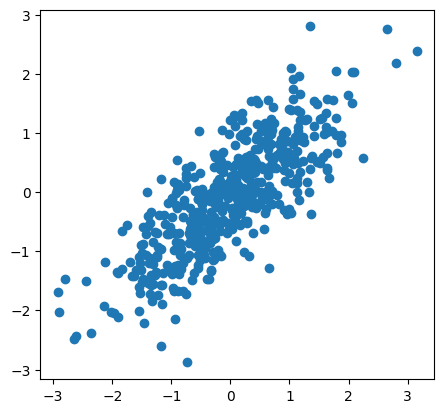

In [88]:
mean = torch.zeros(2)
covariance = torch.tensor(
    [[1, 0.8],
     [0.8, 1]]
)
gaussian = distributions.MultivariateNormal(mean, covariance) # can model dependencies between different components
samples = gaussian.sample((500,))
plt.gca().set_aspect("equal")
plt.scatter(samples[:, 0].numpy(), samples[:, 1].numpy())

### Understanding distribution shapes

There are three different "shapes" that you need to keep in mind when defining and sampling from a distribution:

- **Batch shape**: The number of different (possibly non-iid) values you will sample at once.
    - Specified when initializing the distribution. In the example above, it's the number of covariance matrices we provide (3)
- **Event shape**: The shape of a single sample from one of the distributions in the batch.
    - Specified when initializing the distribution. In the example above, it's the size of our covariance matrix (2)
- **Sample shape:** The number of iid samples we take from the overall distribution.
    - Specified when calling `sample()`. In the example above, we asked for a sample shape of `(5,)`

In general, when you call `dist.sample(sample_shape)`, the result will have shape `(sample_shape, batch_shape, event_shape)`.


In [89]:
mean = torch.zeros(2)
covariance = torch.tensor(
    [
     [[1, 0.8],
     [0.8, 2]],
     [[1, -0.2],
      [-0.2, 1]],
     [[4, 0.6],
      [0.6, 0.5]]
    ]
)
gaussian = distributions.MultivariateNormal(mean, covariance)
sample = gaussian.sample((5,))

print(gaussian.batch_shape)
print(gaussian.event_shape)
print(sample.shape)

torch.Size([3])
torch.Size([2])
torch.Size([5, 3, 2])


### Distributions in neural nets

Typically, your network will output the parameters of a distribution (e.g. the mean and covariance of a Gaussian):

In [90]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return distributions.Normal(x, scale=1)

distribution_network = Net(1, 1)
x = torch.randn(100, 1)
distribution = distribution_network(x)
distribution

Normal(loc: torch.Size([100, 1]), scale: torch.Size([100, 1]))

### Example: Training a conditional Gaussian model

Let's use what we've covered to train a Gaussian model:

$$\pi(a|s) \sim \mathcal{N} (f_\theta(s), \Sigma)$$

(To make this example concrete, you could imagine that we're trying to learn a policy through behavior cloning given some data from an expert. Given some state $s$, our policy will output a Gaussian action distribution $\pi(a|s)$, whose mean and standard deviation we will predict using a neural network.)

In [91]:
class GaussianPolicy(nn.Module):
    def __init__(self, input_size, output_size):
        super(GaussianPolicy, self).__init__()

        # Mean will be a function of input; std will be a fixed (learned) value
        self.mean_fc1 = nn.Linear(input_size, 32)
        self.mean_fc2 = nn.Linear(32, 32)
        self.mean_fc3 = nn.Linear(32, output_size)
        self.log_std = nn.Parameter(torch.randn(output_size))

    def forward(self, x):
        mean = F.relu(self.mean_fc1(x))
        mean = F.relu(self.mean_fc2(mean))
        mean = self.mean_fc3(mean)
        return distributions.Normal(mean, self.log_std.exp())



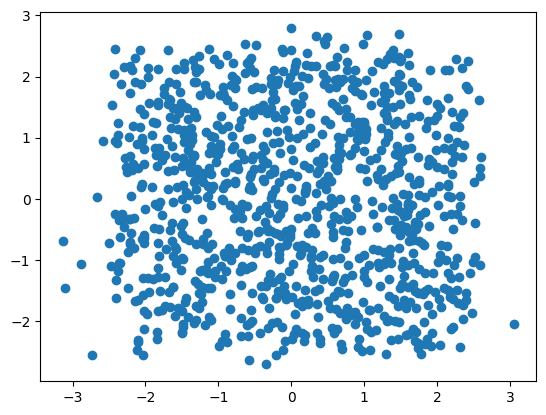

In [92]:
states = torch.rand(1000, 2) - 0.5 # 1000 samples of 2-dimensional states

true_means = states**3 + 4.5*states
true_cov = torch.diag(torch.tensor([0.1, 0.05]))
expert_actions = torch.distributions.MultivariateNormal(true_means, true_cov).sample()

plt.scatter(expert_actions[:,0], expert_actions[:,1])

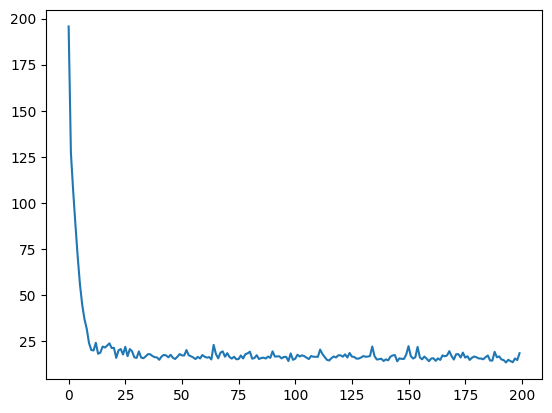

In [93]:
from torch.utils.data import DataLoader, TensorDataset

policy = GaussianPolicy(2, 2)
optimizer = optim.Adam(policy.parameters(), lr=0.01)

dataset = TensorDataset(states, expert_actions)
loader = DataLoader(dataset, batch_size=64, shuffle=True) # gives you data in batches

losses = []
for epoch in range(200):
    epoch_loss = 0
    for curr_states, curr_actions in loader:
        dist = policy(curr_states)
        # dist = torch.distributions.Normal(mean, torch.exp(log_std))
        loss = -dist.log_prob(curr_actions).sum()

        optimizer.zero_grad()
        loss.backward()
        epoch_loss += loss.detach().cpu().numpy().squeeze()
        optimizer.step()
    losses.append(epoch_loss / len(loader))

plt.plot(losses)

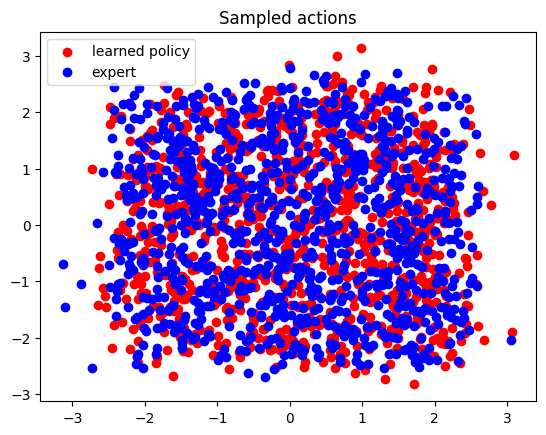

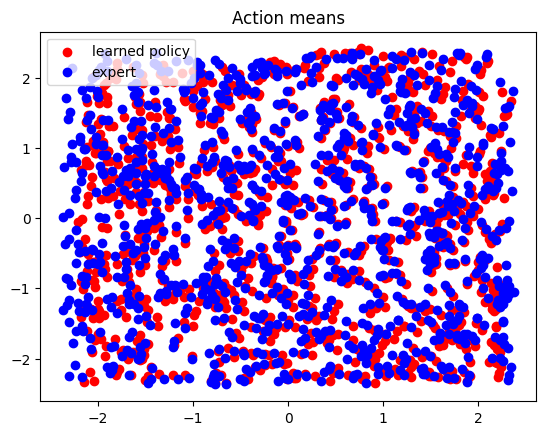

In [94]:
policy.eval()
with torch.no_grad():
    dist = policy(states)
    pred_means = dist.mean.cpu().numpy()
    pred_actions = dist.sample().cpu().numpy()

plt.figure()
plt.title("Sampled actions")
plt.scatter(pred_actions[:,0], pred_actions[:,1], color='r', label='learned policy')
plt.scatter(expert_actions[:,0], expert_actions[:,1], color='b', label='expert')
plt.legend()

plt.figure()
plt.title("Action means")
plt.scatter(pred_means[:,0], pred_means[:,1], color='r', label='learned policy')
plt.scatter(true_means[:,0], true_means[:,1], color='b', label='expert')
plt.legend()

## Extra-curriculum
---
* [PyTorch basics tutorial](https://pytorch.org/tutorials/beginner/basics/intro.html) (I'd recommend the [Quickstart](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html) and [Tensors](https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html) sections).
* To learn more on how a tensor can represent data, see this video: [What's a tensor?](https://youtu.be/f5liqUk0ZTw)
* To learn how PyTorch works under the hood [PyTorch internals](http://blog.ezyang.com/2019/05/pytorch-internals)